----
# **K-NEAREST NEIGHBOURS**
-----

### OBJECTIVE :

####  The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets


### TASKS :

##### DATA PREPROCESSING :

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

In [11]:
df=pd.read_csv('Zoo.csv')

In [12]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [14]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [15]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [16]:
numerical_features = ['legs', 'tail', 'catsize']

In [17]:
binary_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 
                   'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'domestic']

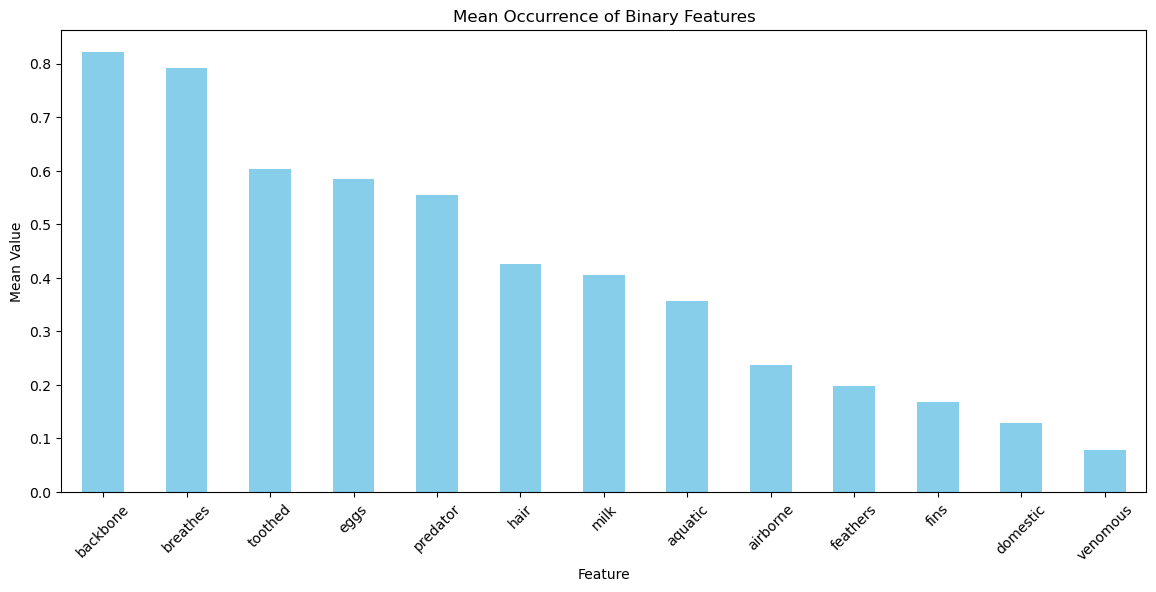

In [18]:
plt.figure(figsize=(14, 6))
df[binary_features].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Mean Occurrence of Binary Features")
plt.ylabel("Mean Value")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.show()

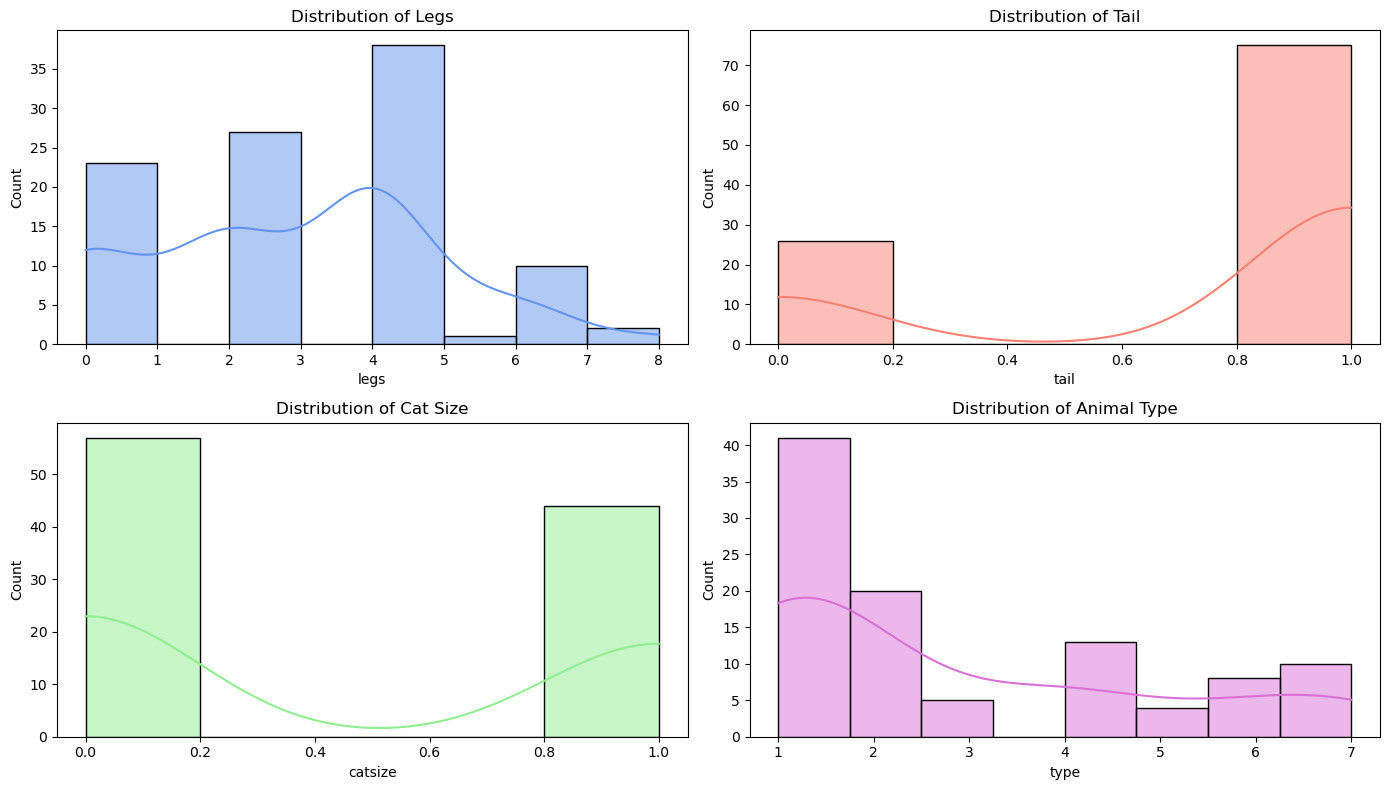

In [19]:
#  Distribution of Numerical Features (legs, tail, catsize, type)
plt.figure(figsize=(14, 8))

# Subplot 1: Legs Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['legs'], kde=True, bins=8, color="cornflowerblue")
plt.title("Distribution of Legs")

# Subplot 2: Tail Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['tail'], kde=True, bins=5, color="salmon")
plt.title("Distribution of Tail")

# Subplot 3: Cat Size Distribution
plt.subplot(2, 2, 3)
sns.histplot(df['catsize'], kde=True, bins=5, color="lightgreen")
plt.title("Distribution of Cat Size")

# Subplot 4: Animal Type Distribution
plt.subplot(2, 2, 4)
sns.histplot(df['type'], kde=True, bins=8, color="orchid")
plt.title("Distribution of Animal Type")

plt.tight_layout()
plt.show()


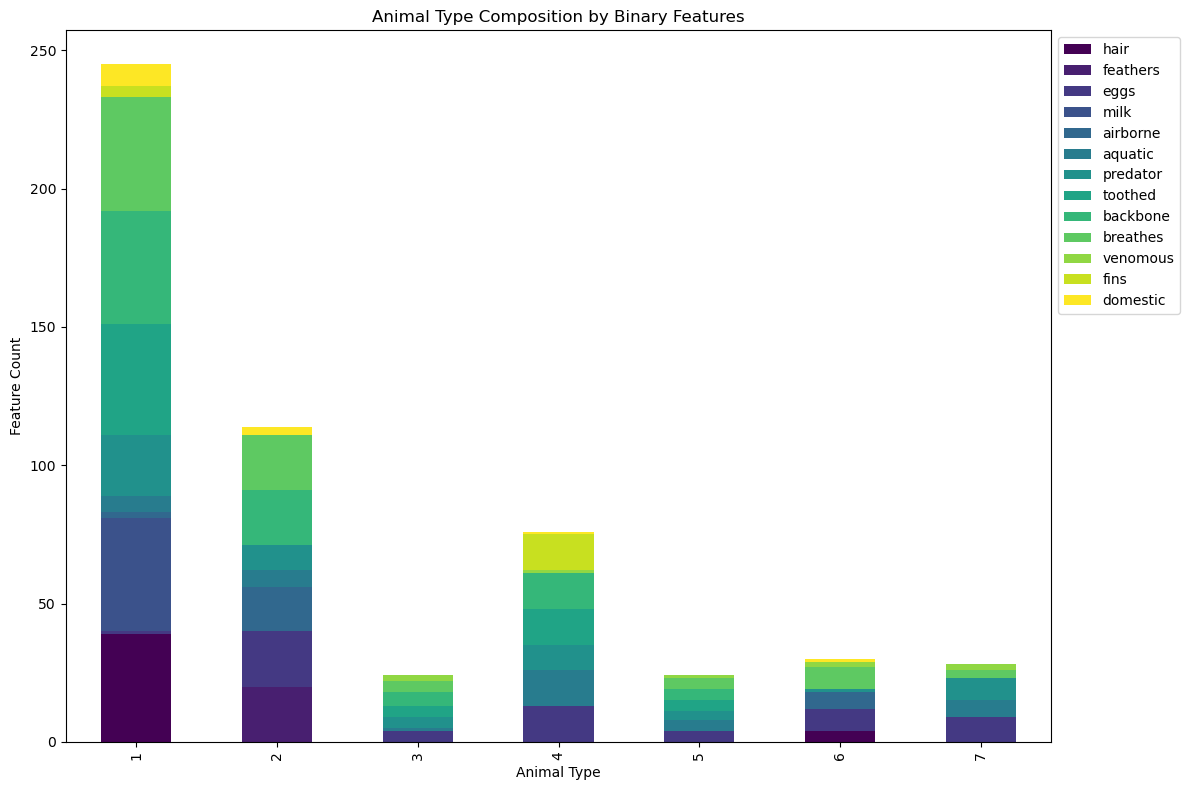

In [20]:
# 4. Stacked Bar Plot: Binary Feature Distribution per Animal Type
type_feature_df = df.groupby('type')[binary_features].sum()

type_feature_df.plot(kind="bar", stacked=True, figsize=(12, 8), colormap="viridis")
plt.title("Animal Type Composition by Binary Features")
plt.xlabel("Animal Type")
plt.ylabel("Feature Count")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

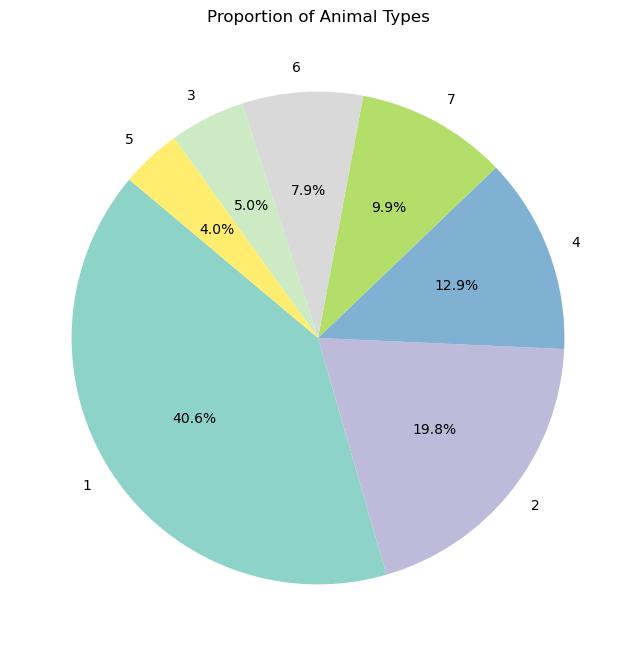

In [21]:
# 5. Pie Chart for Proportion of Animal Types
plt.figure(figsize=(8, 8))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap="Set3")
plt.title("Proportion of Animal Types")
plt.ylabel("")
plt.show()

#### Split the Dataset :

In [23]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame and `target` is your target variable
X = df.drop(columns=['type'])
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Preprocessing for numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#### Implement the KNN Algorithm :

In [26]:
# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])
# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)

# Evaluate the classifier's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#### Visualize the decision boundaries of the classifier :

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [35]:
# Encode categorical features
df_encoded = df.copy()
for column in df_encoded.select_dtypes(include=['object','int64']).columns:
    df_encoded[column] = LabelEncoder().fit_transform(df_encoded[column])

In [37]:
# Use encoded data as input
X= df_encoded.drop(columns=['type'])  # Adjust 'type' if your target column has a different name
y = df_encoded['type']  # Target variable

In [41]:
# Step 1: Apply PCA to the original dataset
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

In [43]:
# Step 2: Define and fit the classifier on the 2D PCA-transformed data
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_2d, y)

KNeighborsClassifier(n_neighbors=3)

In [45]:
# Generate mesh grid for decision boundary visualization
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

In [55]:
# Predict across the mesh
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

In [56]:
Z = Z.reshape(xx.shape)

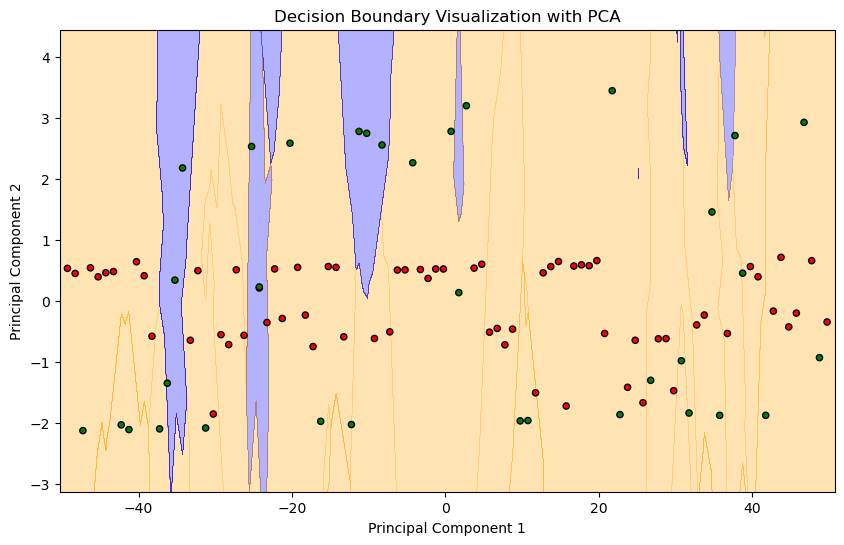

In [57]:
# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('orange', 'blue')))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=ListedColormap(('red', 'green')), edgecolor='k', s=20)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Decision Boundary Visualization with PCA")
plt.show()

---------
### Interview Questions :
----------

-

### 1. **Key Hyperparameters in K-Nearest Neighbors (KNN)**

1. **Number of Neighbors (k)**:
   - Determines how many neighbors are considered when making a classification or regression decision. A small value of \( k \) may capture noise, while a large value can lead to over-smoothing.

2. **Distance Metric**:
   - Defines how the algorithm calculates the distance between points (e.g., Euclidean, Manhattan). The choice of metric affects which neighbors are considered "nearest."

3. **Weight Function**:
   - Defines how each neighbor's influence is weighted. Options include uniform (all neighbors contribute equally) or distance-based (closer neighbors have more influence).

4. **Algorithm**:
   - KNN can use different algorithms for finding the nearest neighbors: 'auto', 'ball_tree', 'kd_tree', or 'brute'. The choice affects computational efficiency depending on the dataset's size and dimensionality.

5. **Leaf Size**:
   - Relevant if using BallTree or KDTree algorithms, leaf size controls the tree structure, impacting speed and memory usage. Smaller leaf sizes can improve accuracy but ince computation.

---

### 2. **Distance Metrics Used in K-Nearest Neighbors (KNN)**

1. **Euclidean Distance**:
   - Most common distance metric in KNN, calculated as the straight-line distance between two points in Euclidean space. Suitable for continuous features but sensitive to scale.

2. **Manhattan Distance (L1 Norm)**:
   - Also known as "taxicab" or "city block" distance, it calculates the sum of the absolute differences between points. Useful when data has high dimensions or when movement is along grid-like paths.

3. **Minkowski Distance**:
   - A generalization of both Euclidean and Manhattan distances. It includes a parameter \( p \): when \( p=2 \), it is Euclidean distance, and when \( p=1 \), it is Manhattan distance. Adjustable for various use cases.

4. **Cosine Similarity**:
   - Measures the cosine of the angle between two vectors. Commonly used in text or document data, where the angle between vectors (rather than distance) better reflects similarity.

5. **Hamming Distance**:
   - Counts the number of differing elements between two points. Often used for categorical data, binary data, or text, particularly eters and popular distance metrics in KNN.